taken from https://github.com/microsoft/autogen/blob/main/notebook/agentchat_auto_feedback_from_code_execution.ipynb

# Auto Generated Agent Chat: Task Solving with Code Generation, Execution & Debugging

AutoGen offers conversable LLM agents, which can be used to solve various tasks with human or automatic feedback, including tasks that require using tools via code.
Please find documentation about this feature [here](https://microsoft.github.io/autogen/docs/Use-Cases/agent_chat).

In this notebook, we demonstrate how to use `AssistantAgent` and `UserProxyAgent` to write code and execute the code. Here `AssistantAgent` is an LLM-based agent that can write Python code (in a Python coding block) for a user to execute for a given task. `UserProxyAgent` is an agent which serves as a proxy for the human user to execute the code written by `AssistantAgent`, or automatically execute the code. Depending on the setting of `human_input_mode` and `max_consecutive_auto_reply`, the `UserProxyAgent` either solicits feedback from the human user or returns auto-feedback based on the result of code execution (success or failure and corresponding outputs) to `AssistantAgent`. `AssistantAgent` will debug the code and suggest new code if the result contains error. The two agents keep communicating to each other until the task is done.

## Requirements

AutoGen requires `Python>=3.8`. To run this notebook example, please install:
```bash
pip install pyautogen
```

In [ ]:
# %pip install pyautogen~=0.2.0b4

## Set your API Endpoint

The [`config_list_from_json`](https://microsoft.github.io/autogen/docs/reference/oai/openai_utils#config_list_from_json) function loads a list of configurations from an environment variable or a json file.


In [4]:
import autogen

config_list = autogen.config_list_from_json(
    "OAI_CONFIG_LIST-mistral",
    filter_dict={
        "model": ["mistral-small"],
    },
)

## Example Task: Check Stock Price Change

In the example below, let's see how to use the agents in AutoGen to write a python script and execute the script. This process involves constructing a `AssistantAgent` to serve as the assistant, along with a `UserProxyAgent` that acts as a proxy for the human user. In this example demonstrated below, when constructing the `UserProxyAgent`,  we select the `human_input_mode` to "NEVER". This means that the `UserProxyAgent` will not solicit feedback from the human user. It stops replying when the limit defined by `max_consecutive_auto_reply` is reached, or when `is_termination_msg()` returns true for the received message.

In [5]:
# create an AssistantAgent named "assistant"
assistant = autogen.AssistantAgent(
    name="assistant",
    llm_config={
        "cache_seed": 42,  # seed for caching and reproducibility
        "config_list": config_list,  # a list of OpenAI API configurations
        "temperature": 0,  # temperature for sampling
    },  # configuration for autogen's enhanced inference API which is compatible with OpenAI API
)
# create a UserProxyAgent instance named "user_proxy"
user_proxy = autogen.UserProxyAgent(
    name="user_proxy",
    human_input_mode="NEVER",
    max_consecutive_auto_reply=10,
    is_termination_msg=lambda x: x.get("content", "").rstrip().endswith("TERMINATE"),
    code_execution_config={
        "work_dir": "coding",
        "use_docker": False,  # set to True or image name like "python:3" to use docker
    },
)
# the assistant receives a message from the user_proxy, which contains the task description
user_proxy.initiate_chat(
    assistant,
    message="What date is today? Compare the LTM gain for META and TESLA."
)

user_proxy (to assistant):

What date is today? Compare the LTM gain for META and TESLA.

--------------------------------------------------------------------------------
assistant (to user_proxy):

Sure, I can help with that. Here's a Python script that will print the current date and compare the LTM (last twelve months) gain for Meta (formerly Facebook) and Tesla using the `yfinance` library to retrieve the stock data.

First, you'll need to install the `yfinance` library if you haven't already. You can do this by running the following command in your terminal:

```sh
pip install yfinance
```

Once you have `yfinance` installed, you can use the following Python script to get the current date and compare the LTM gain for Meta and Tesla:

```python
# filename: compare_ltm_gain.py

import yfinance as yf
from datetime import datetime

# Get current date
current_date = datetime.now().strftime("%Y-%m-%d")
print(f"Current date: {current_date}")

# Get stock data for Meta and Tesla
meta_data

The example above involves code execution. In AutoGen, code execution is triggered automatically by the `UserProxyAgent` when it detects an executable code block in a received message and no human user input is provided. This process occurs in a designated working directory, using a Docker container by default. Unless a specific directory is specified, AutoGen defaults to the `autogen/extensions` directory. Users have the option to specify a different working directory by setting the `work_dir` argument when constructing a new instance of the `UserProxyAgent`.

The whole chat is auto-generated.

## Example Task: Plot Chart

In [6]:
# followup of the previous question
user_proxy.send(
    recipient=assistant,
    message="""Plot a chart of their stock price change LTM and save to stock_price_ltm.png.""",
)

user_proxy (to assistant):

Plot a chart of their stock price change LTM and save to stock_price_ltm.png.

--------------------------------------------------------------------------------
assistant (to user_proxy):

Sure, here's a Python script that uses the `matplotlib` library to plot a chart of the stock price change LTM for Meta Platforms Inc. (META) and Tesla (TSLA), and saves the chart to a file named `stock_price_ltm.png`:

```python
# filename: plot_stock_price_ltm.py

import yfinance as yf
import matplotlib.pyplot as plt

# Get stock data for Meta and Tesla
meta_data = yf.Ticker("META").history(period="1y")
tesla_data = yf.Ticker("TSLA").history(period="1y")

# Calculate LTM gain for Meta
meta_open_price = meta_data['Open'][0]
meta_close_price = meta_data['Close'][-1]
meta_ltm_gain = (meta_close_price - meta_open_price) / meta_open_price * 100

# Calculate LTM gain for Tesla
tesla_open_price = tesla_data['Open'][0]
tesla_close_price = tesla_data['Close'][-1]
tesla_ltm_gain = (

Let's display the generated figure.

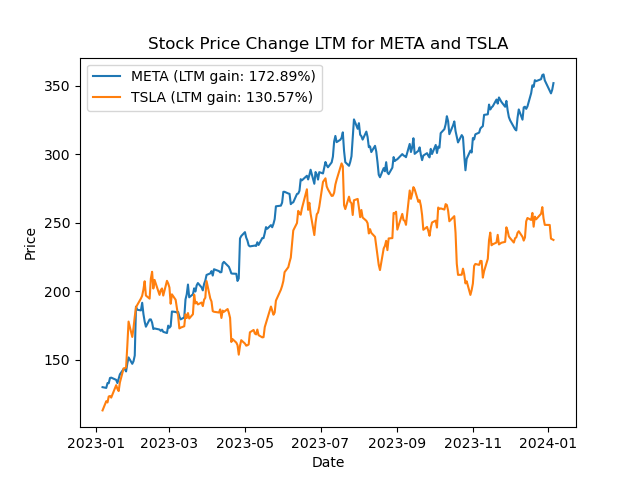

In [7]:
from IPython.display import Image

Image(filename='coding/stock_price_ltm.png')